# Import necessary packages

In [1]:
import datetime
import pandas as pd
from modules import Modules
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

# Initialise functions

In [2]:
down_data = Modules.DownloadData()

# Import data

#### Opens the local file. If not found or outdated, the missing data will be downloaded

In [3]:
df_pm = down_data.download_data('pm')
df_meteo = down_data.download_data('meteo')

0it [00:00, ?it/s]
0it [00:00, ?it/s]


# Plot 

In [4]:
# Average PM concentration over 1h period
df_pm_mean = df_pm.groupby(pd.Grouper(freq='h')).mean()

In [5]:
# Select time window
start_date = datetime.datetime(2022,3,15,12)
end_date = datetime.datetime(2022,3,17,12)

# Define dates format
dates_format = mdates.DateFormatter('%H:%M \n %d %b')

# Select data within the time window
df_plot = df_pm_mean.loc[start_date:end_date]

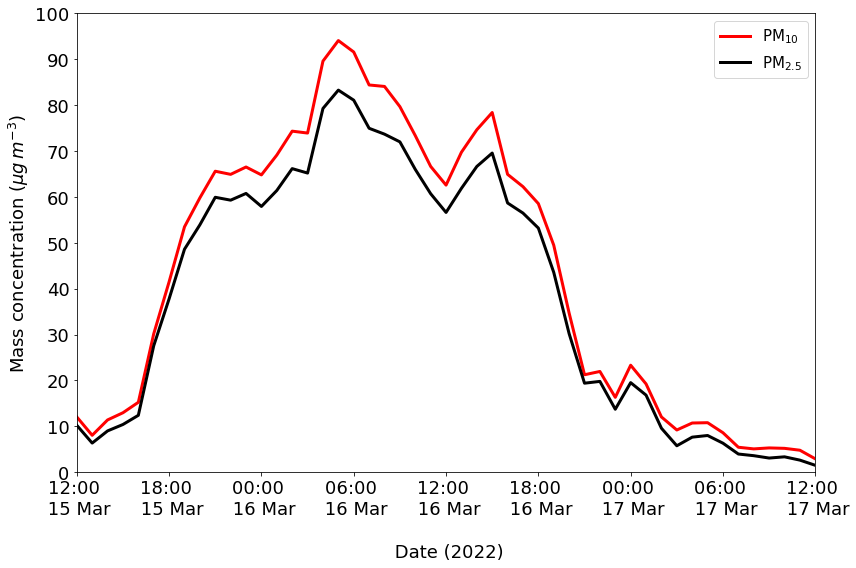

In [6]:
# Initialise the figure
fig,ax = plt.subplots(figsize = (12,8))

# Plot the data
plt.plot(df_plot[['P1']], label = 'PM$_{10}$', color = 'Red', linewidth=3)
plt.plot(df_plot[['P2']], label = 'PM$_{2.5}$', color = 'Black', linewidth=3)

# Define the labels for x and y axes
plt.xlabel('\n Date (2022)', fontsize =18)
plt.ylabel(r'Mass concentration ($\mu g \, m^{-3}$)', fontsize =18)

# Set x and y axis limits
plt.xlim(start_date,end_date)
plt.ylim(0,100)

# Define the font size for x and y ticks
plt.xticks(fontsize=18)
ax.xaxis.set_major_formatter(dates_format)
plt.yticks(range(0,110,10),fontsize=18)

# Add the legend 
plt.legend(fontsize=15)

# Save plot as png
fig.tight_layout()
fig.savefig('./img/20220316_saharan_dust.png', dpi=300)

# Show the plot
plt.show()